In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df= pd.read_csv('metadata.csv')
df_binary=df[['smoke', 'drink', 'pesticide', 'gender', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation', 'biopsed']]
df.dropna(inplace=True)
df['img_id'].to_csv('pictures')

In [3]:
def binarise(df, col):
    for columns in col:
        df[columns]= np.where(df[columns]==True, 1, 0)
    return df

col_bool=['smoke', 'drink', 'pesticide', 'skin_cancer_history', 'cancer_history', 'has_piped_water', 'has_sewage_system','biopsed']
binarise(df, col_bool)

def binarise_str(df, col):
    for columns in col:
        df[columns]=np.where(df[columns]=='True',1,0)
    return df

col_str=['itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation']
binarise_str(df, col_str)

df['gender']= np.where(df['gender']=='FEMALE', 1, 0)
df['diagnostic']=np.where((df['diagnostic']=='BCC') ^ (df['diagnostic']=='MEL') ^ (df['diagnostic']=='SCC'), 1, 0)
df

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
1,PAT_46,881,0,0,POMERANIA,POMERANIA,55,0,1,1,...,5.0,1,1,1,0,1,1,1,PAT_46_881_939.png,1
4,PAT_684,1302,0,1,POMERANIA,POMERANIA,79,0,0,1,...,5.0,1,1,1,0,0,1,1,PAT_684_1302_588.png,1
6,PAT_778,1471,0,1,GERMANY,ITALY,52,0,1,0,...,10.0,1,0,1,0,1,1,1,PAT_778_1471_835.png,1
7,PAT_117,179,0,0,POMERANIA,POMERANIA,74,1,1,0,...,10.0,1,1,1,1,0,1,1,PAT_117_179_983.png,1
9,PAT_705,4015,0,1,GERMANY,GERMANY,58,1,1,1,...,7.0,0,0,1,0,0,0,0,PAT_705_4015_413.png,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,PAT_386,785,1,0,POMERANIA,POMERANIA,66,0,0,1,...,15.0,0,1,0,1,0,1,1,PAT_386_785_536.png,1
2291,PAT_273,421,0,0,POMERANIA,POMERANIA,41,1,0,0,...,5.0,1,1,0,1,0,1,1,PAT_273_421_905.png,1
2292,PAT_491,934,0,0,POMERANIA,POMERANIA,43,1,1,1,...,5.0,1,1,0,0,0,1,1,PAT_491_934_46.png,1
2294,PAT_46,880,0,0,POMERANIA,POMERANIA,55,0,1,1,...,12.0,1,1,1,0,1,0,0,PAT_46_880_140.png,1


In [4]:
columns_to_drop=['img_id', 'background_father', 'background_mother', 'lesion_id', 'patient_id', 'biopsed','region']
df= df.drop(columns=columns_to_drop)


In [5]:
df

,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation
1,0,0,55,0,1,1,1,1,1,3.0,6.0,5.0,1,1,1,0,1,1,1
4,0,1,79,0,0,1,0,0,0,1.0,5.0,5.0,1,1,1,0,0,1,1
6,0,1,52,0,1,0,1,1,1,3.0,15.0,10.0,1,0,1,0,1,1,1
7,0,0,74,1,1,0,0,0,0,1.0,15.0,10.0,1,1,1,1,0,1,1
9,0,1,58,1,1,1,1,1,1,1.0,9.0,7.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,1,0,66,0,0,1,0,1,1,2.0,20.0,15.0,0,1,0,1,0,1,1
2291,0,0,41,1,0,0,0,0,0,2.0,9.0,5.0,1,1,0,1,0,1,1
2292,0,0,43,1,1,1,1,0,0,2.0,9.0,5.0,1,1,0,0,0,1,1
2294,0,0,55,0,1,1,1,1,1,3.0,13.0,12.0,1,1,1,0,1,0,0


In [6]:
correlation= df.corr(method='spearman')
correlation

,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation
smoke,1.000000,0.177542,0.096796,0.066753,-0.194269,-0.057428,-0.017709,0.067195,0.055092,-0.019149,0.054940,0.059784,0.102218,0.060642,0.016277,0.031873,0.022869,0.015182,0.074609
drink,0.177542,1.000000,-0.151127,0.196140,-0.360684,-0.024904,0.032358,-0.073909,-0.030090,0.015069,-0.013773,0.020155,0.046838,-0.113684,0.008842,0.023252,0.012262,-0.001482,0.027320
age,0.096796,-0.151127,1.000000,-0.230572,-0.000987,-0.100733,0.012626,0.074783,0.080252,-0.172191,0.084104,0.107177,0.067945,0.142759,-0.011023,0.081030,-0.017665,0.059361,0.066953
pesticide,0.066753,0.196140,-0.230572,1.000000,-0.308814,0.052705,0.007980,-0.139096,-0.113517,0.057608,0.042330,0.036118,0.050848,0.044355,0.068581,0.051486,0.032444,0.039453,-0.021170
gender,-0.194269,-0.360684,-0.000987,-0.308814,1.000000,0.077291,0.072720,-0.018258,0.017556,0.054073,-0.091773,-0.111955,-0.083864,-0.068758,-0.002745,-0.067729,0.008335,-0.069599,-0.050528
skin_cancer_history,-0.057428,-0.024904,-0.100733,0.052705,0.077291,1.000000,0.025044,-0.027458,-0.047964,0.025505,-0.047715,-0.019980,0.035046,0.059996,-0.012075,0.026301,-0.007884,0.023808,0.009723
cancer_history,-0.017709,0.032358,0.012626,0.007980,0.072720,0.025044,1.000000,0.045708,0.040828,0.038029,-0.095896,-0.100166,-0.024908,-0.026317,0.055227,0.059743,0.018661,0.013960,-0.043226
has_piped_water,0.067195,-0.073909,0.074783,-0.139096,-0.018258,-0.027458,0.045708,1.000000,0.750902,0.080100,0.029396,0.032924,-0.015356,0.023506,-0.073267,-0.023836,0.005582,-0.013579,0.013816
has_sewage_system,0.055092,-0.030090,0.080252,-0.113517,0.017556,-0.047964,0.040828,0.750902,1.000000,0.133172,0.002837,0.015684,-0.035594,0.000141,-0.098375,-0.028757,0.055388,-0.046882,0.015547
fitspatrick,-0.019149,0.015069,-0.172191,0.057608,0.054073,0.025505,0.038029,0.080100,0.133172,1.000000,-0.083221,-0.075029,-0.100134,-0.051872,0.085563,-0.084388,0.060251,-0.041191,-0.031351


<Axes: >

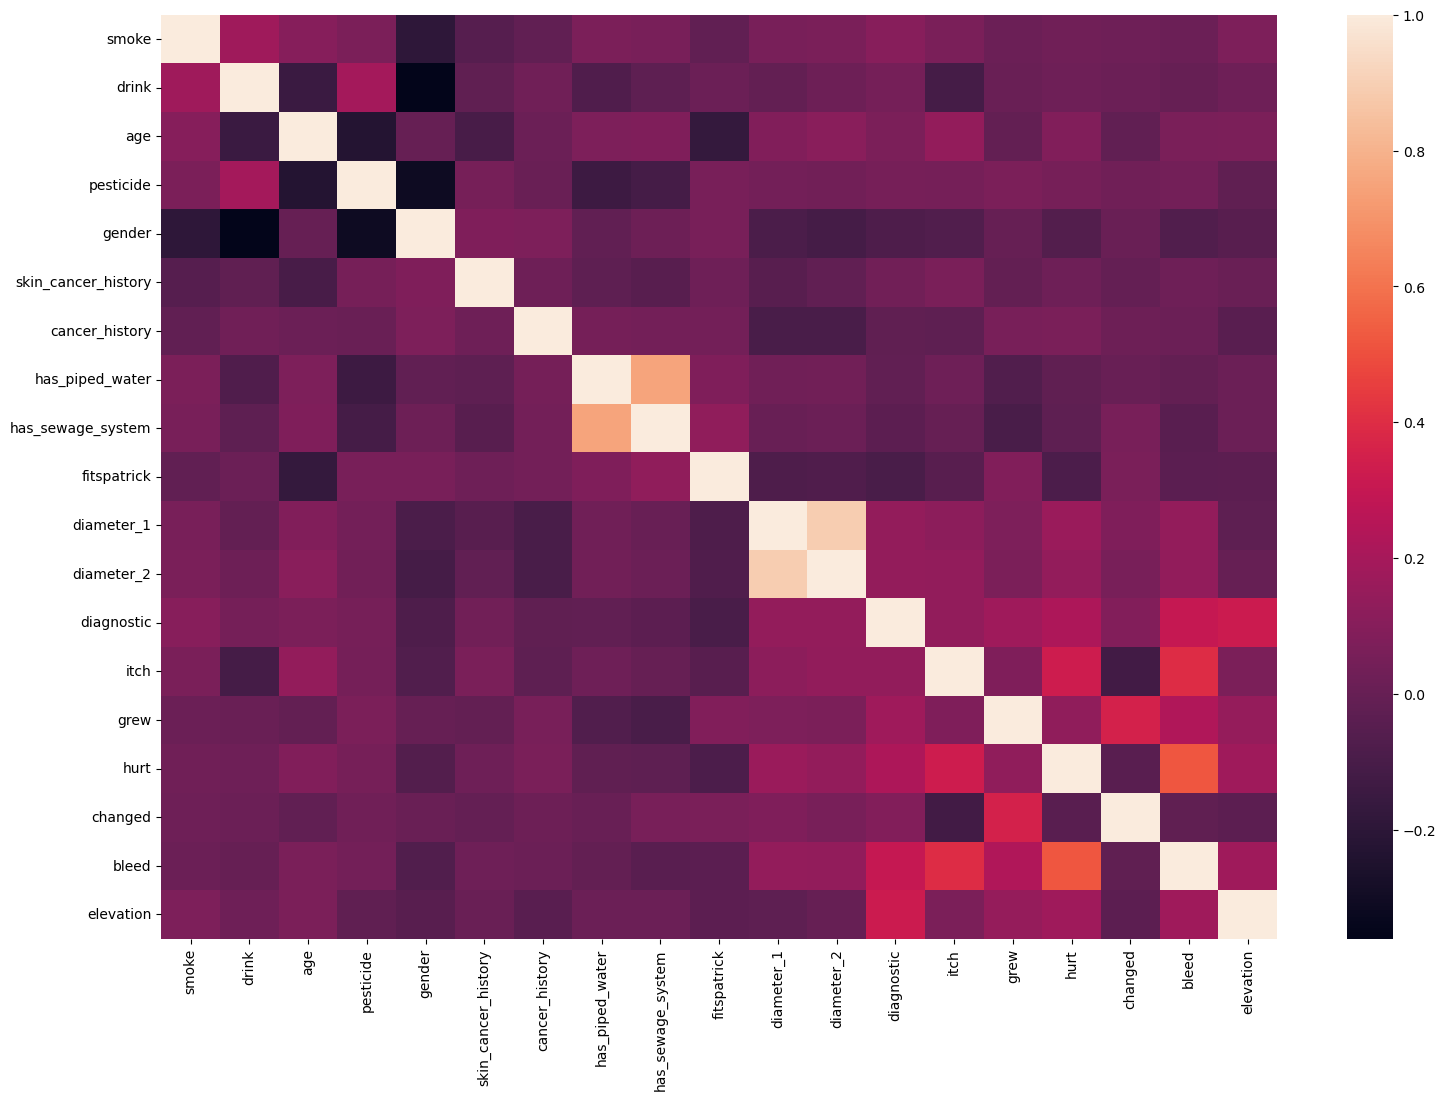

In [7]:
fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
sns.heatmap(correlation)

In [8]:
cancer_corr = correlation['diagnostic'].dropna()
cancer_corr_sorted = cancer_corr.reindex(cancer_corr.abs().sort_values(ascending=False).index)

print("Top correlations with Cancer:")
print(cancer_corr_sorted[1:])

Top correlations with Cancer:
elevation              0.321342
bleed                  0.298451
hurt                   0.222595
grew                   0.181307
diameter_1             0.142560
diameter_2             0.140362
itch                   0.136183
smoke                  0.102218
fitspatrick           -0.100134
changed                0.088977
gender                -0.083864
age                    0.067945
pesticide              0.050848
drink                  0.046838
has_sewage_system     -0.035594
skin_cancer_history    0.035046
cancer_history        -0.024908
has_piped_water       -0.015356
Name: diagnostic, dtype: float64


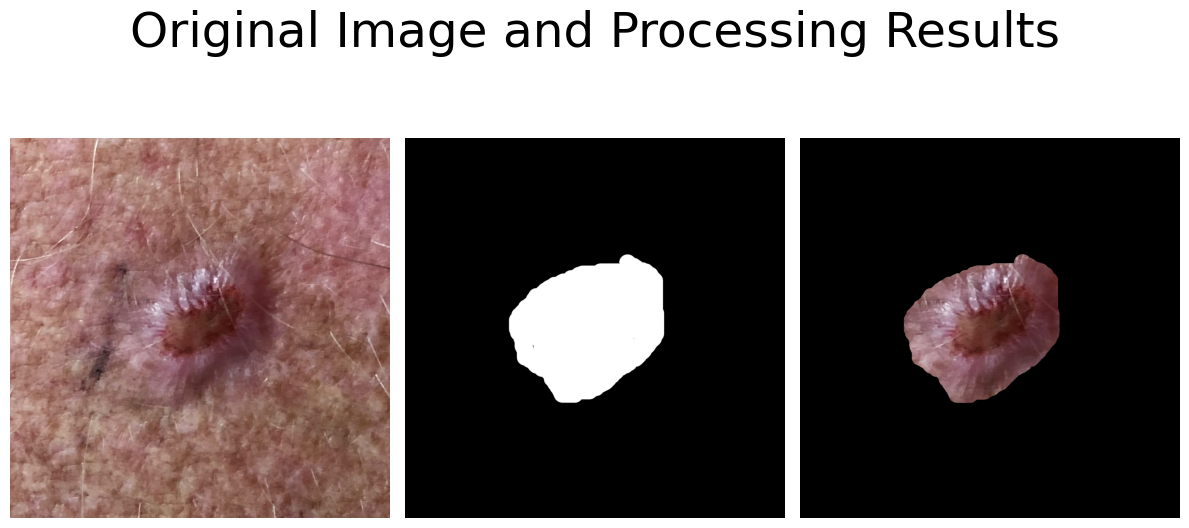

In [9]:
## Masking images
import cv2
img=cv2.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\good_images\PAT_8_15_820.png",cv2.IMREAD_COLOR_RGB)
mask=cv2.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\padchest_lesion_masks\lesion_masks\PAT_8_15_820_mask.png")
image_masked=img.copy()
image_masked[mask==0] = 0
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
fig.suptitle('Original Image and Processing Results', fontsize=35)
ax[0].imshow(img)
#ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(mask)
#ax[1].set_title('Mask')
ax[1].axis('off')
ax[2].imshow(image_masked)
#ax[2].set_title('Masked Image')
ax[2].axis('off')
plt.tight_layout()
plt.show()


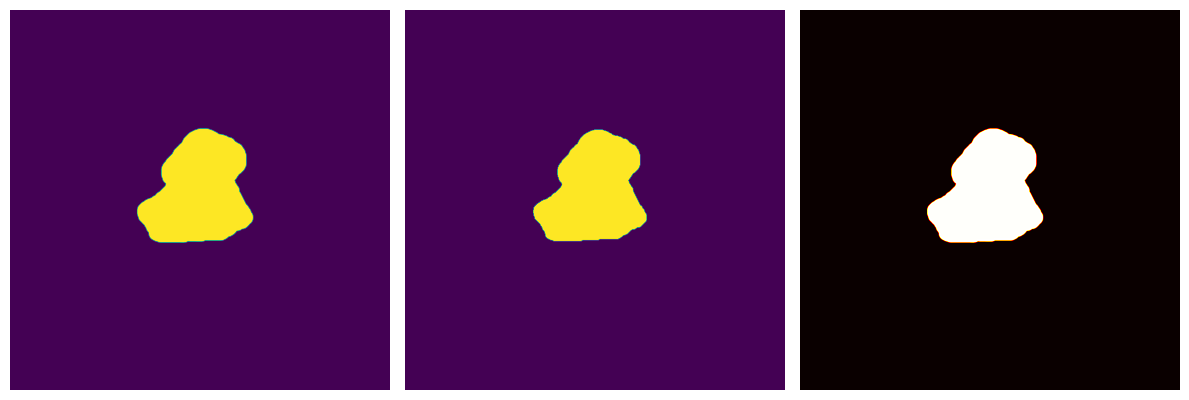

In [10]:
## Compactness
from skimage import morphology
mask=cv2.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\padchest_lesion_masks\lesion_masks\PAT_21_31_965_mask.png",cv2.IMREAD_GRAYSCALE)
def get_compactness(mask):
    # mask = color.rgb2gray(mask)
    area = np.sum(mask)

    struct_el = morphology.disk(3)
    mask_eroded = morphology.binary_erosion(mask, struct_el)
    perimeter_mask = mask.astype(int) - mask_eroded.astype(int)


    return mask,mask_eroded,perimeter_mask

mask,mask_eroded,perimeter=get_compactness(mask)
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
#fig.suptitle('Original Image and Processing Results', fontsize=35)
ax[0].imshow(mask)
#ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(mask_eroded)
#ax[1].set_title('Mask')
ax[1].axis('off')
ax[2].imshow(perimeter,cmap='hot')
#ax[2].set_title('Masked Image')
ax[2].axis('off')
plt.tight_layout()
plt.show()

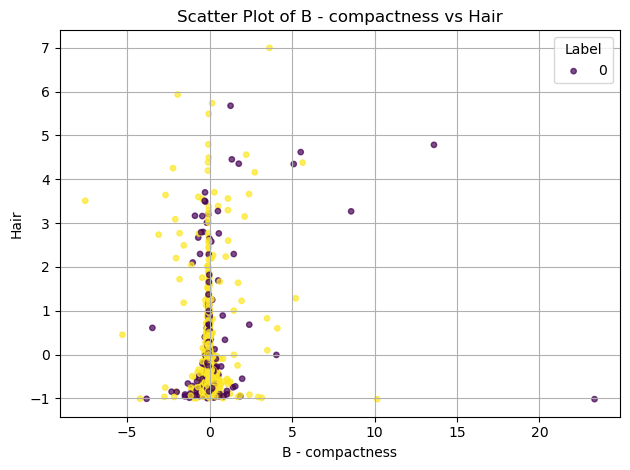

In [11]:
## Scatterplot of 2 features, change names as necessary
import pandas as pd
df=pd.read_csv(r"C:\Users\MATEJ\Downloads\features(3).csv")
f=df[['B - compactness','Hair']]
labels=df['Cancer']
columns=f.columns
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(f)
fscaled=pd.DataFrame(scaler.transform(f),columns=columns,dtype=np.float64)
f1scaled,f2scaled=fscaled[columns[0]],fscaled[columns[1]]
# f1scaled,f2scaled=df[columns[0]],df[columns[1]]
plt.scatter(f1scaled, f2scaled, alpha=0.7, c=labels, s=15, edgecolor=None)
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title(f'Scatter Plot of {columns[0]} vs {columns[1]}')
plt.legend(title='Label',labels=labels) # this does not work properly
plt.grid(True)
plt.tight_layout()
plt.show()

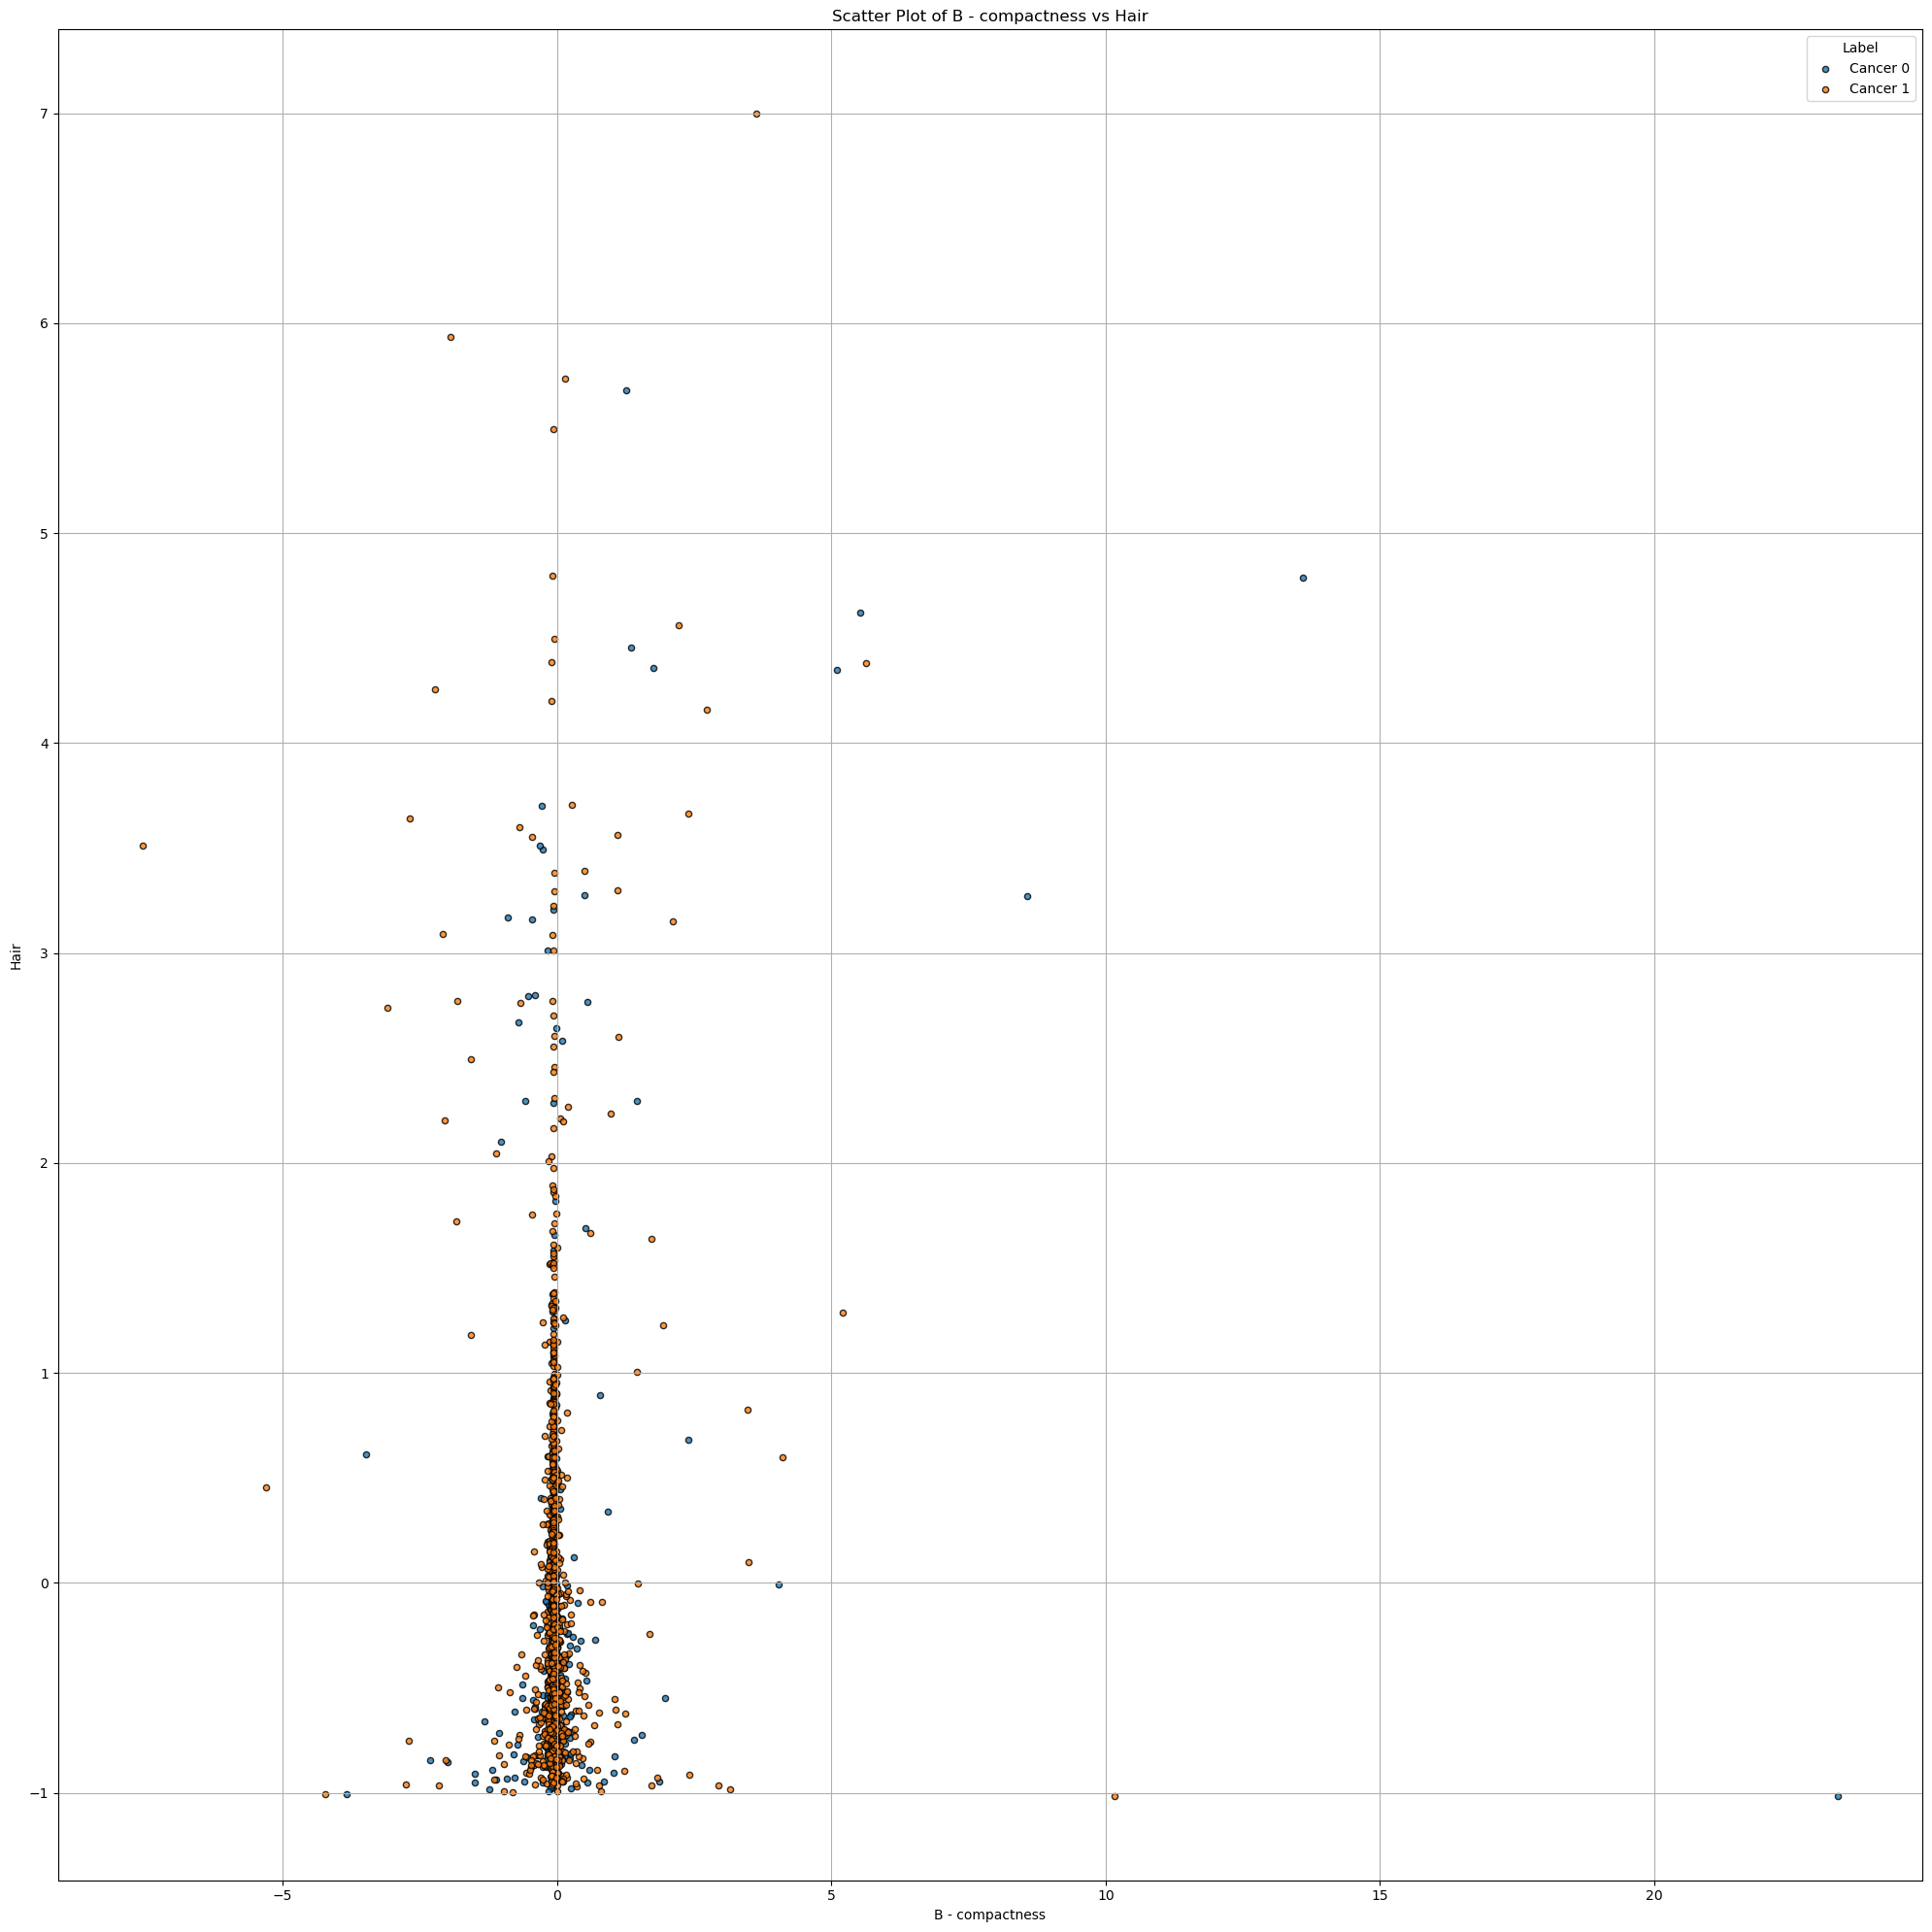

In [12]:
## Larger and nicer version of the code above, uses same variables - cell above this needs to be run
import matplotlib.pyplot as plt
import numpy as np

unique_labels = np.unique(labels)
colors = plt.cm.tab10.colors

plt.figure(figsize=(20, 20))
for i, label in enumerate(unique_labels):
    plt.scatter(
        f1scaled[labels == label], 
        f2scaled[labels == label], 
        color=colors[i], 
        label=f'Cancer {label}',
        alpha=0.8, 
        edgecolor='k', 
        s=20
    )

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title(f'Scatter Plot of {columns[0]} vs {columns[1]}')
plt.legend(title='Label')
plt.grid(True)
plt.tight_layout()
plt.show()


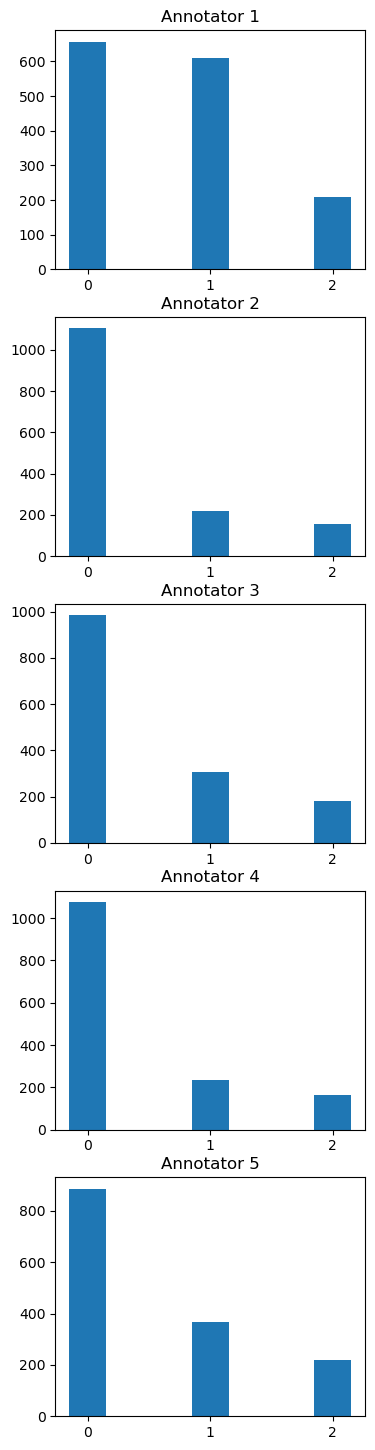

In [13]:
## Annotator bar graphs
df = pd.read_csv(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\manual_annotations.csv")
fig,ax=plt.subplots(5,1,figsize=(4,18))
for i in range(5):
    heights=df[f'Rating_{i+1}'].value_counts()
    ax[i].bar([0,1,2],heights ,data=df[f'Rating_{i+1}'],width=0.3,tick_label=[0,1,2])
    ax[i].set_title(f'Annotator {i+1}')

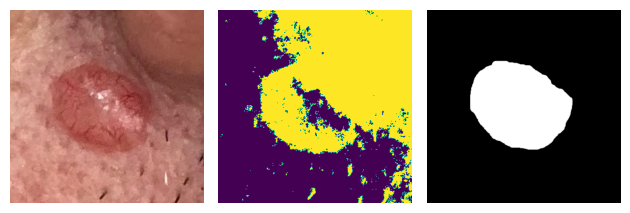

In [38]:
## bad mask
mask=cv2.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\padchest_lesion_masks\lesion_masks\PAT_36_49_935_mask.png")
img=cv2.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\good_images\PAT_36_49_935.png",cv2.IMREAD_COLOR_RGB)
#img=cv2.imread(r"C:\Users\MATEJ\Documents\BDS SEMESTER 2\Projects in Data Science\Project\good_images\PAT_69_1053_540.png",cv2.IMREAD_COLOR_RGB)
from skimage.color import rgb2gray
from skimage.filters import gaussian, threshold_otsu
def get_mask(image):
    gray_im = rgb2gray(image)
    blurred_im = gaussian(gray_im, sigma=1.0)
    t=threshold_otsu(blurred_im)
    mask = gray_im<t
    return mask

mask2=get_mask(img)
fig,ax=plt.subplots(1,3)
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(mask2)
ax[1].axis('off')
ax[2].imshow(mask)
ax[2].axis('off')
plt.tight_layout()